In [7]:
import numpy as np
import matplotlib.pyplot as plt
from src import *

In [8]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [9]:
#General Parameters
n = 96
k = 48
res = 1e-12
trialNumber = 20
normalization = 1e-12
pRange = range(0,9,2)

#SVD Parameters
sketchType = 'Gaussian'

In [10]:
def runAlgorithm(algorithm,n,k,res,trialNumber,normalization,pRange,sketchType='Gaussian'):
    data = {}

    for p in pRange:

        coherences = []
        errors = []

        for coherenceScalar in np.arange(0,.3,.001)[::-1]:

            trialErrors = []

            #Generate A and calculate coherence
            U, sigma, V =getMatrix(n,k,res,'coherent','smooth gap',True, coherenceScalar)
            coherences.append(coherence(V,k))
            A = U@sigma@V.T

            #Generate Â and calculate approximation error
            for j in range(trialNumber):
                if algorithm == 'SVD':
                    Ahat= randomSVD(A,k,p,0,sketchType)
                elif algorithm == 'RCS':
                    Ahat= randomColumnSelection(A,k,p)
                trialErrors.append(np.linalg.norm(Ahat-A, ord = 2)/normalization)
            errors.append(np.average(np.array(trialErrors)))

            trialErrors = []

            #Generate A and calculate coherence
            U, sigma, V =getMatrix(n,k,res,'incoherent','smooth gap',True, coherenceScalar)
            coherences.append(coherence(V,k))
            A = U@sigma@V.T

            #Generate Â and calculate approximation error
            for j in range(trialNumber):
                if algorithm == 'SVD':
                    Ahat= randomSVD(A,k,p,0,sketchType)
                elif algorithm == 'RCS':
                    Ahat= randomColumnSelection(A,k,p)
                trialErrors.append(np.linalg.norm(Ahat-A, ord = 2)/normalization)
            errors.append(np.average(np.array(trialErrors)))

        #Sort by coherence for nice graphing
        sortingIndices = np.argsort(coherences)
        coherences = np.array(coherences)[sortingIndices]
        errors = np.array(errors)[sortingIndices]
        data[p] = [coherences,errors]
    return data

In [11]:
rSVD = runAlgorithm('RCS',n,k,res,trialNumber,normalization,pRange,sketchType)

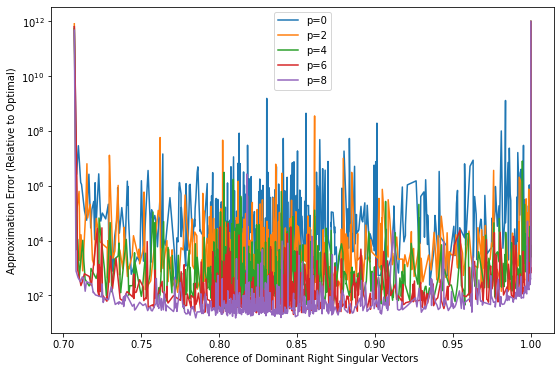

In [12]:
fig = plt.figure(figsize=(9,6))

for p in rSVD.keys():
    coherences, errors = rSVD[p]
    plt.semilogy(coherences,errors, label = 'p=' + str(p))
plt.xlabel('Coherence of Dominant Right Singular Vectors')
plt.ylabel('Approximation Error (Relative to Optimal)')
plt.legend()
plt.savefig('Data/RSVD.png',facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())